In [4]:
import urllib.request
import pandas as pd
import bs4
import numpy as np
from matplotlib import font_manager,rc
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
import scipy.stats
from sklearn import manifold

In [5]:
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 14
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

In [6]:
top =pd.read_csv('C:/MartRepository/4Mart/발표자료/data/topmart_shop_info_loc.csv',encoding='utf-8')
top.head()

,store,address,Latitude,Longitude,tel
0,탑마트 영도봉래점,부산광역시 영도구 태종로 194,35.094210,129.049444,051)418-2102~3
1,탑마트 진영점,경상남도 김해시 진영읍 진영로 221,35.302670,128.736928,055)345-0388~9
2,탑마트 금사점,부산광역시 금정구 공단서로 22 (강산병원 옆),35.216975,129.110783,051)527-2222
3,탑마트 통영점,경상남도 통영시 미수해안로 164-13 (봉평오거리 옆),34.832157,128.413960,055)648-8161~3
4,탑마트 진주점,경상남도 진주시 도동로 251,35.192582,128.121298,055)762-2571~5


In [7]:
top = pd.DataFrame(top['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
top

,d1,d2
0,부산광역시,영도구
1,경상남도,김해시
2,부산광역시,금정구
3,경상남도,통영시
4,경상남도,진주시
...,...,...
72,경상남도,진주시
73,대구광역시,중구
74,경상남도,양산시
75,경상북도,경주시


In [8]:
T = top.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
T.head()

경상남도 김해시     7
경상남도 창원시     7
경상남도 진주시     6
부산광역시 사하구    6
경상북도 포항시     4
dtype: int64

In [11]:
emart =pd.read_csv('C:/MartRepository/4Mart/발표자료/data/Emart_info.csv',encoding='utf-8')
emart.head()

,store,address,Latitude,Longitude,tel
0,이마트 가든5점,서울특별시 송파구 충민로 10,37.478232,127.119370,02-411-1234
1,이마트 가양점,서울특별시 강서구 양천로 559,37.557897,126.862298,02-2101-1234
2,이마트 강릉점,강원도 강릉시 경강로 2398-10,37.770583,128.922618,033-649-1234
3,이마트 검단점,인천광역시 서구 서곶로 754,37.585534,126.677194,032-440-1234
4,이마트 경기광주점,경기도 광주시 광주대로 30,37.409522,127.261229,031-8026-1234


In [12]:
emart = pd.DataFrame(emart['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
emart

,d1,d2
0,서울특별시,송파구
1,서울특별시,강서구
2,강원도,강릉시
3,인천광역시,서구
4,경기도,광주시
...,...,...
132,서울특별시,성북구
133,부산광역시,해운대구
134,경기도,화성시
135,경기도,고양시


In [13]:
E = emart.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
E.head()

경기도 용인시     6
경기도 남양주시    4
경기도 고양시     4
충청남도 천안시    3
경기도 수원시     3
dtype: int64

In [14]:
home =pd.read_csv('../data/Homeplus_shop_info_loc4.csv',encoding='utf-8')
home.head()

,store,address,Latitude,Longitude,tel
0,홈플러스 가양점,서울특별시 강서구 양천로 431,37.564245,126.849942,02-2063-2080
1,홈플러스 가좌점,인천광역시 서구 가정로 151번길 11,37.497567,126.670690,032-453-8000
2,홈플러스 간석점,인천광역시 남동구 경원대로 971,37.469524,126.689069,032-870-8000
3,홈플러스 강동점,서울특별시 강동구 양재대로 1571(메르디안 쇼핑센터),37.545658,127.142244,02-3400-8000
4,홈플러스 강릉점,강원도 강릉시 경강로 2120,37.755659,128.898621,033-649-8000


In [15]:
home = pd.DataFrame(home['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
home

,d1,d2
0,서울특별시,강서구
1,인천광역시,서구
2,인천광역시,남동구
3,서울특별시,강동구
4,강원도,강릉시
...,...,...
129,경상북도,포항시
130,서울특별시,마포구
131,부산광역시,해운대구
132,경기도,화성시


In [16]:
H = home.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
H.head()

경기도 수원시      5
충청북도 청주시     3
인천광역시 남동구    3
경상남도 창원시     3
서울특별시 중랑구    3
dtype: int64

In [17]:
lotte =pd.read_csv('../data/lotte.csv',encoding='utf-8')
lotte.head()

,store,address,Latitude,Longitude,tel
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500


In [18]:
lotte = pd.DataFrame(lotte['address'].apply(lambda v: v.split()[:2]).tolist(), columns=('d1', 'd2'))
lotte

,d1,d2
0,부산광역시,기장군
1,경기도,파주시
2,경기도,수원시
3,서울특별시,광진구
4,경상남도,거제시
...,...,...
107,경상북도,포항시
108,서울특별시,성동구
109,충청남도,홍성군
110,부산광역시,북구


In [19]:
L = lotte.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
L.head()

경기도 수원시      6
경상남도 창원시     6
경기도 시흥시      3
대전광역시 유성구    3
서울특별시 송파구    3
dtype: int64

In [20]:
THEL = pd.DataFrame({'T':T,'H':H,'E':E, 'L':L}).fillna(0)
THEL['total'] =THEL.sum(axis=1)
THEL = THEL.sort_values(by=['total'], ascending=False)
THEL.head

<bound method NDFrame.head of             T    H    E    L  total
경상남도 창원시  7.0  3.0  2.0  6.0   18.0
경기도 수원시   0.0  5.0  3.0  6.0   14.0
경상남도 김해시  7.0  1.0  1.0  2.0   11.0
경기도 고양시   0.0  3.0  4.0  3.0   10.0
경상남도 진주시  6.0  1.0  1.0  1.0    9.0
...       ...  ...  ...  ...    ...
경상북도 영주시  0.0  1.0  0.0  0.0    1.0
울산광역시 중구  0.0  1.0  0.0  0.0    1.0
경상북도 상주시  0.0  0.0  1.0  0.0    1.0
인천광역시 남구  0.0  1.0  0.0  0.0    1.0
부산광역시 동구  1.0  0.0  0.0  0.0    1.0

[152 rows x 5 columns]>

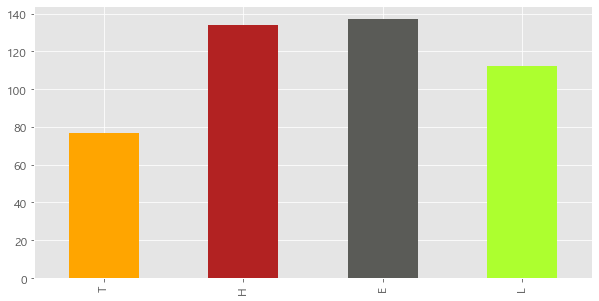

In [22]:
style.use('ggplot')
rcParams['font.size'] = 12

plt.figure(figsize=(10, 5))
colors = ['#FFA500','#B22222','#5A5B57','#ADFF2F']
THEL.sum(axis=0).iloc[:4].plot(kind='bar', color=colors)
plt.show()

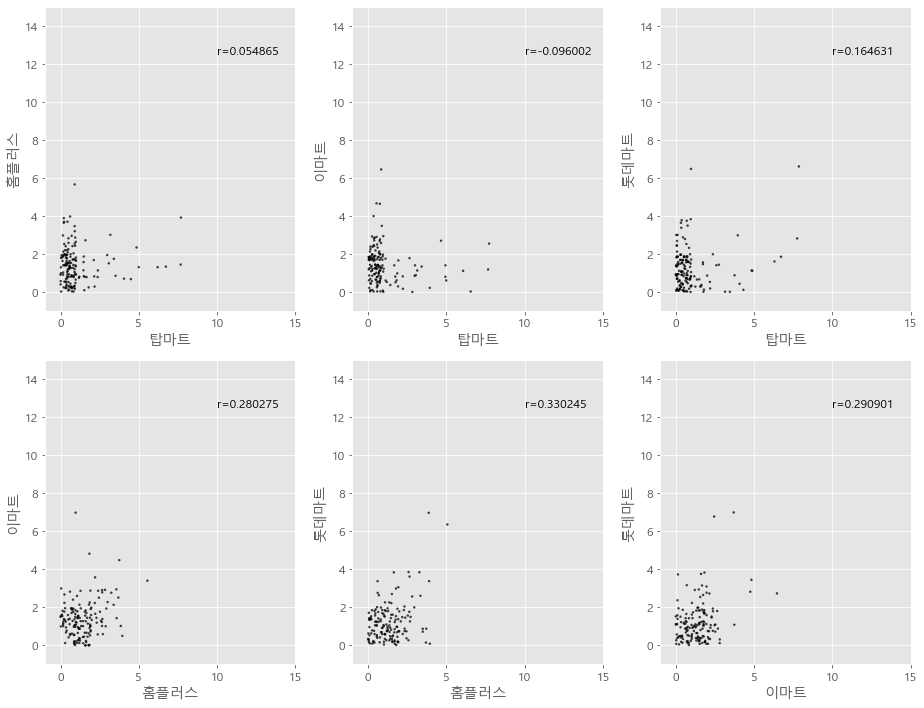

In [23]:
fig = plt.figure(figsize=(13, 10))

def plot_nstores(b1, b2, label1, label2):
    plt.scatter(THEL[b1] + np.random.random(len(THEL)),
                THEL[b2] + np.random.random(len(THEL)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15)
    plt.ylim(-1, 15)
    plt.xlabel(label1)
    plt.ylabel(label2)

    r = scipy.stats.pearsonr(THEL[b1], THEL[b2])
    plt.annotate('r={:3f}'.format(r[0]),(10,12.5))

ax = fig.add_subplot(2,3,1)
plot_nstores('T', 'H', '탑마트', '홈플러스')

ax = fig.add_subplot(2,3,2)
plot_nstores('T', 'E', '탑마트', '이마트')

ax = fig.add_subplot(2,3,3)
plot_nstores('T', 'L', '탑마트', '롯데마트')

ax = fig.add_subplot(2,3,4)
plot_nstores('H', 'E', '홈플러스', '이마트')

ax = fig.add_subplot(2,3,5)
plot_nstores('H', 'L', '홈플러스', '롯데마트')

ax = fig.add_subplot(2,3,6)
plot_nstores('E', 'L', '이마트', '롯데마트')


plt.tight_layout()

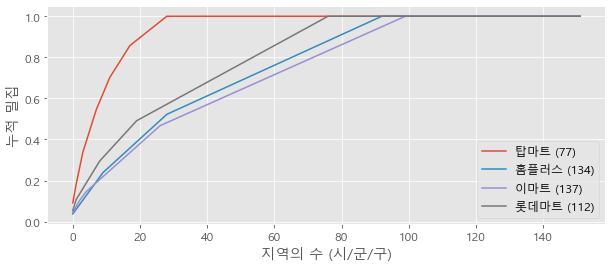

In [24]:
plt.figure(figsize=(10,4))
for col, label in [('T', '탑마트'),('H','홈플러스'),('E','이마트'),('L','롯데마트')]:
    cumulv = np.cumsum(sorted(THEL[col], reverse=True)) / THEL[col].sum()
    plt.plot(cumulv, label='{} ({})'.format(label, int(THEL[col].sum())))
plt.legend(loc='best')
plt.xlabel('지역의 수 (시/군/구)')
plt.ylabel('누적 밀집')
plt.show()

In [26]:
population =pd.read_csv('../data_draw_korea.csv',index_col=0, encoding='utf-8')
population.head()

,인구수,shortName,x,y,면적,d1,d2
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [27]:
for item in range(0, len(population)):
    population['d2'][item] = population['d2'][item].strip()

C:\Users\admin\AppData\Local\Temp\ipykernel_7668\4042398491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['d2'][item] = population['d2'][item].strip()


In [28]:
population.tail()

,인구수,shortName,x,y,면적,d1,d2
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시
228,198077,충주,6,10,983.70,충청북도,충주시


In [29]:
population['name'] = population.apply(lambda i: i['d1'] + ' ' + i['d2'], axis='columns')
population.head()

,인구수,shortName,x,y,면적,d1,d2,name
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [30]:
population = population.set_index('name')
population.head()

,인구수,shortName,x,y,면적,d1,d2
name,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [31]:
thel = pd.DataFrame({'T':T, 'H':H, 'L':L, 'E':E}).fillna(0)
thel = pd.merge(population, thel, how='outer', left_index=True, right_index=True)
thel.head()

,인구수,shortName,x,y,면적,d1,d2,T,H,L,E
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,0.0,1.0,0.0,1.0
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,NaN,NaN,NaN,NaN
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,0.0,0.0,0.0,1.0
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,0.0,1.0,0.0,0.0
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,0.0,0.0,0.0,1.0


In [32]:
thel=thel.drop('shortName', axis='columns')

In [33]:
thel=thel.drop('면적', axis='columns')

In [34]:
thel[thel['d1'].isnull()]

,인구수,x,y,d1,d2,T,H,L,E
세종특별자치시 금송로,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
세종특별자치시 절재로,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
세종특별자치시 조치원읍,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
인천광역시 미추홀구,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0
충청북도 청원군,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0


In [35]:
mart_cols = ['T', 'E', 'H', 'L']
thel.loc['세종특별자치시 세종시', mart_cols] += thel.loc['세종특별자치시 금송로', mart_cols]
thel.loc['세종특별자치시 세종시', mart_cols] += thel.loc['세종특별자치시 절재로', mart_cols]
thel.loc['세종특별자치시 세종시', mart_cols] += thel.loc['세종특별자치시 조치원읍', mart_cols]
thel.loc['인천광역시 미추홀구', mart_cols] += thel.loc['인천광역시 남구', mart_cols]
thel.loc['충청북도 청주시', mart_cols] += thel.loc['충청북도 청원군', mart_cols]

In [36]:
thel = thel[~thel['d1'].isnull()].fillna(0)

In [37]:
thel[thel['d1'].isnull()]

,인구수,x,y,d1,d2,T,H,L,E


In [38]:
thel['total'] = THEL['total'] =THEL.sum(axis=1)

In [39]:
thel.head()

,인구수,x,y,d1,d2,T,H,L,E,total
강원도 강릉시,202520.0,11.0,4.0,강원도,강릉시,0.0,1.0,0.0,1.0,4.0
강원도 고성군,25589.0,9.0,0.0,강원도,고성군,0.0,0.0,0.0,0.0,NaN
강원도 동해시,86747.0,11.0,5.0,강원도,동해시,0.0,0.0,0.0,1.0,2.0
강원도 삼척시,63986.0,11.0,8.0,강원도,삼척시,0.0,1.0,0.0,0.0,2.0
강원도 속초시,76733.0,9.0,1.0,강원도,속초시,0.0,0.0,0.0,1.0,2.0


In [40]:
thel['THEL']= thel['T'] + thel['H'] + thel['E'] + thel['L']
thel['population'] = thel['THEL'] / thel['인구수']
thel['top'] = thel['T'] / thel['인구수']
thel['home'] = thel['H'] / thel['인구수']
thel['emart'] = thel['E'] / thel['인구수']
thel['lotte'] = thel['L'] / thel['인구수']

In [41]:
thel = thel.sort_values(by='NewIdx', ascending=False)
thel.head(10)

KeyError: 'NewIdx'

In [ ]:
thel = thel.sort_values(by='TotalIdx', ascending=False)
thel.head(10)

,인구수,x,y,d1,d2,T,H,L,E,total,HEL,THEL,TotalIdx,NewIdx,NewIdx2,population,top,home,emart,lotte
충청북도 청주시,790216.0,6.0,12.0,충청북도,청주시,0.0,4.0,3.0,1.0,14.0,8.0,8.0,0.571429,0.0,0.2,0.000010,0.0,0.000005,0.000001,0.000004
경기도 의정부시,408220.0,7.0,3.0,경기도,의정부시,0.0,1.0,1.0,1.0,6.0,3.0,3.0,0.500000,0.0,0.2,0.000007,0.0,0.000002,0.000002,0.000002
경기도 오산시,200793.0,3.0,8.0,경기도,오산시,0.0,1.0,1.0,1.0,6.0,3.0,3.0,0.500000,0.0,0.2,0.000015,0.0,0.000005,0.000005,0.000005
경기도 시흥시,381412.0,3.0,5.0,경기도,시흥시,0.0,1.0,3.0,1.0,10.0,5.0,5.0,0.500000,0.0,0.2,0.000013,0.0,0.000003,0.000003,0.000008
경기도 수원시,1125461.0,6.0,9.0,경기도,수원시,0.0,5.0,6.0,3.0,28.0,14.0,14.0,0.500000,0.0,0.2,0.000012,0.0,0.000004,0.000003,0.000005
경기도 양평군,95614.0,9.0,6.0,경기도,양평군,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.500000,0.0,0.2,0.000010,0.0,0.000000,0.000000,0.000010
경기도 양주시,191266.0,8.0,2.0,경기도,양주시,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.500000,0.0,0.2,0.000005,0.0,0.000000,0.000005,0.000000
경기도 안양시,566558.0,3.0,4.0,경기도,안양시,0.0,2.0,0.0,2.0,8.0,4.0,4.0,0.500000,0.0,0.2,0.000007,0.0,0.000004,0.000004,0.000000
경기도 안성시,173061.0,4.0,8.0,경기도,안성시,0.0,0.0,1.0,1.0,4.0,2.0,2.0,0.500000,0.0,0.2,0.000012,0.0,0.000000,0.000006,0.000006
경기도 안산시,668089.0,3.0,6.0,경기도,안산시,0.0,2.0,3.0,1.0,12.0,6.0,6.0,0.500000,0.0,0.2,0.000009,0.0,0.000003,0.000001,0.000004


In [42]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [43]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['d1'].endswith('시') and not row['d1'].startswith('세종'):
            dispname = '{}\n{}'.format(row['d1'][:2], row['d2'][:-1])
            if len(row['d2']) <= 2:
                dispname += row['d2'][-1]
        else:
            dispname = row['d2'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('./data/' + 'blockMap_' + targetData + '.png')
                      
    
    plt.show()      

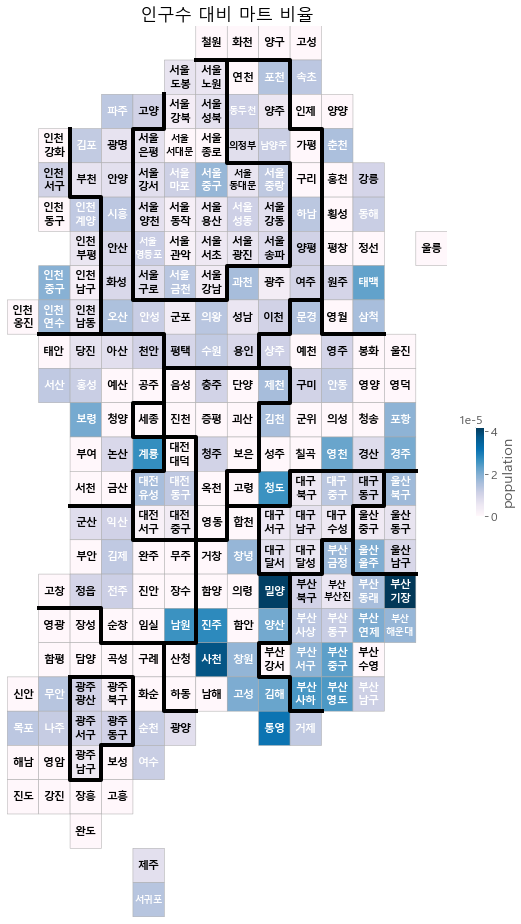

In [44]:
draw_blockMap(thel, 'population', '인구수 대비 마트 비율', 'PuBu')

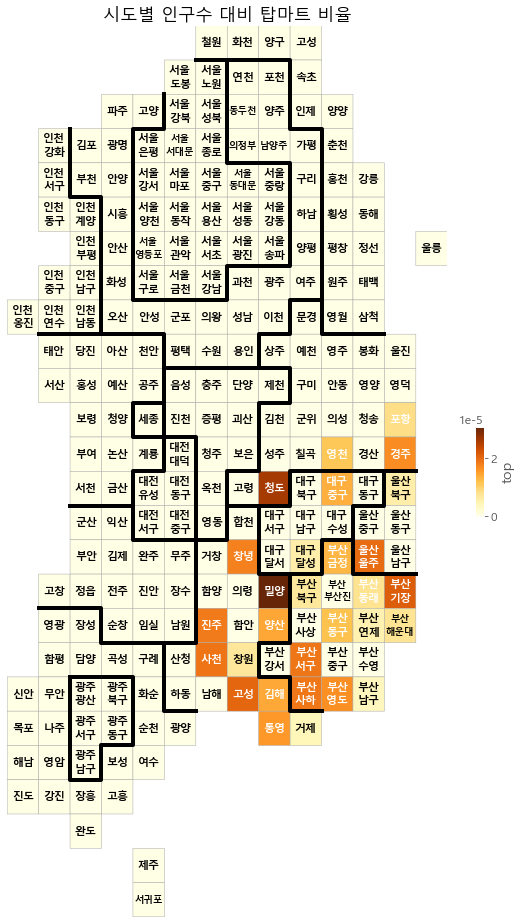

In [45]:
draw_blockMap(thel, 'top', '시도별 인구수 대비 탑마트 비율', 'YlOrBr')

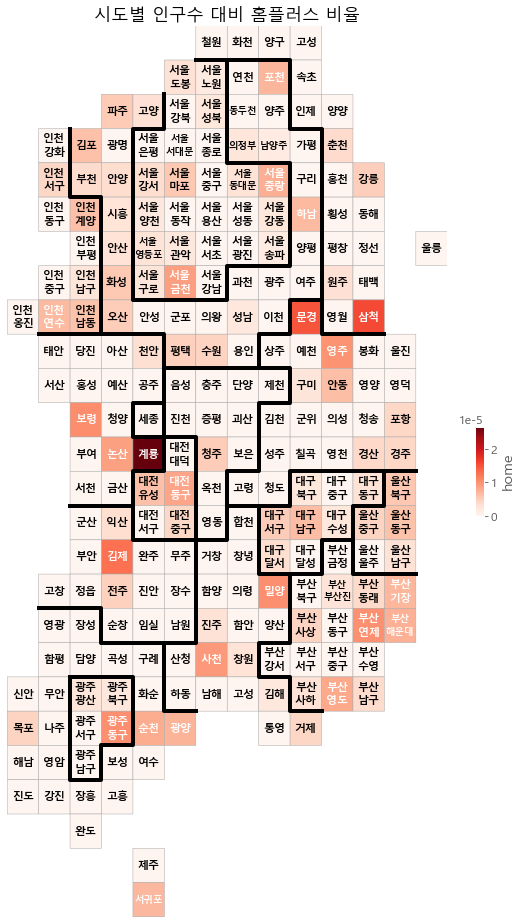

In [46]:
draw_blockMap(thel, 'home', '시도별 인구수 대비 홈플러스 비율', 'Reds')

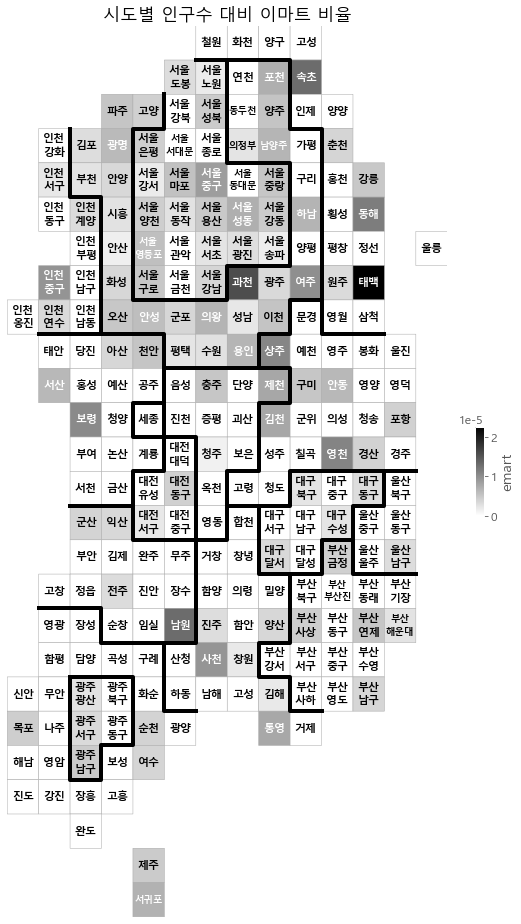

In [47]:
draw_blockMap(thel, 'emart', '시도별 인구수 대비 이마트 비율', 'gray_r')

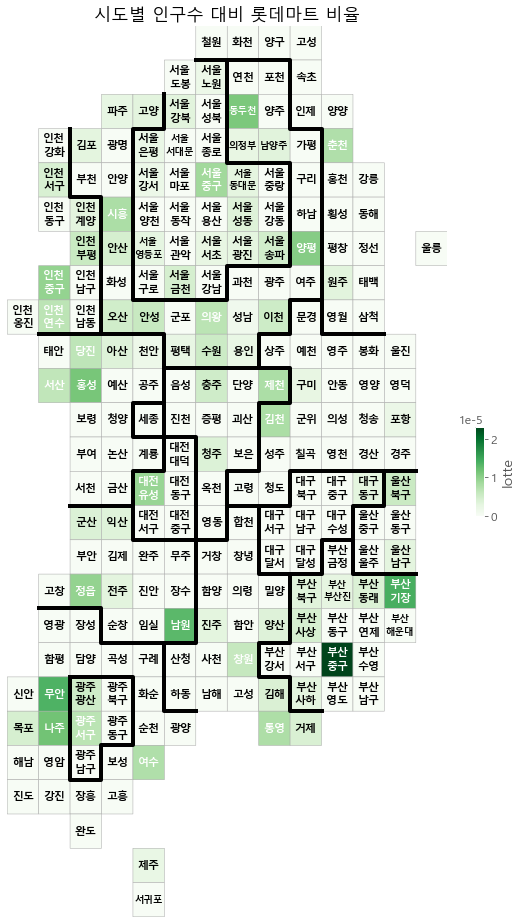

In [48]:
draw_blockMap(thel, 'lotte', '시도별 인구수 대비 롯데마트 비율', 'Greens')